## Importing Libraries and Data

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
import math

### Import data

In [2]:
cwd = os.getcwd()
simp_path = 'raw_data/df.csv'
abs_path = os.path.abspath(os.path.join(cwd,'..',simp_path))
df_sarimax = pd.read_csv(abs_path)

In [3]:
#cheking my dataframe
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,date,sector
0,AAPL,0.513393,0.513393,0.023186,0.513393,0.515625,117258400,1980-12-12,TECHNOLOGY
1,AAPL,0.488839,0.486607,0.021977,0.486607,0.488839,43971200,1980-12-15,TECHNOLOGY
2,AAPL,0.453125,0.450893,0.020364,0.450893,0.453125,26432000,1980-12-16,TECHNOLOGY
3,AAPL,0.462054,0.462054,0.020868,0.462054,0.464286,21610400,1980-12-17,TECHNOLOGY
4,AAPL,0.475446,0.475446,0.021473,0.475446,0.477679,18362400,1980-12-18,TECHNOLOGY


In [4]:
# Transforming the data into a datetime format
df_sarimax["date"] = pd.to_datetime(df_sarimax["date"], infer_datetime_format=True)
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,date,sector
0,AAPL,0.513393,0.513393,0.023186,0.513393,0.515625,117258400,1980-12-12,TECHNOLOGY
1,AAPL,0.488839,0.486607,0.021977,0.486607,0.488839,43971200,1980-12-15,TECHNOLOGY
2,AAPL,0.453125,0.450893,0.020364,0.450893,0.453125,26432000,1980-12-16,TECHNOLOGY
3,AAPL,0.462054,0.462054,0.020868,0.462054,0.464286,21610400,1980-12-17,TECHNOLOGY
4,AAPL,0.475446,0.475446,0.021473,0.475446,0.477679,18362400,1980-12-18,TECHNOLOGY


In [5]:
#Setting a new data index for my dataframe 
df_sarimax.reset_index()
df_sarimax = df_sarimax.set_index(df_sarimax["date"])
df_sarimax = df_sarimax.drop("date", axis=1)
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,sector
date,,,,,,,,
1980-12-12,AAPL,0.513393,0.513393,0.023186,0.513393,0.515625,117258400,TECHNOLOGY
1980-12-15,AAPL,0.488839,0.486607,0.021977,0.486607,0.488839,43971200,TECHNOLOGY
1980-12-16,AAPL,0.453125,0.450893,0.020364,0.450893,0.453125,26432000,TECHNOLOGY
1980-12-17,AAPL,0.462054,0.462054,0.020868,0.462054,0.464286,21610400,TECHNOLOGY
1980-12-18,AAPL,0.475446,0.475446,0.021473,0.475446,0.477679,18362400,TECHNOLOGY


## Decomposition

In [6]:
df_sarimax = df_sarimax[(df_sarimax.index)>"1999-12-31"]
df_sarimax.head()

,ticker,open,close,adj_close,low,high,volume,sector
date,,,,,,,,
2000-01-03,AAPL,3.745536,3.997768,2.686497,3.631696,4.017857,133949200,TECHNOLOGY
2000-01-04,AAPL,3.866071,3.660714,2.459998,3.613839,3.950893,128094400,TECHNOLOGY
2000-01-05,AAPL,3.705357,3.714286,2.495997,3.678571,3.948661,194580400,TECHNOLOGY
2000-01-06,AAPL,3.790179,3.392857,2.279998,3.392857,3.821429,191993200,TECHNOLOGY
2000-01-07,AAPL,3.446429,3.553571,2.387998,3.410714,3.607143,115183600,TECHNOLOGY


In [7]:
#Selecting the stock "T": Telekom to work with it 
df_telekom = df_sarimax[df_sarimax["ticker"]== "T"]
df_telekom.head()

,ticker,open,close,adj_close,low,high,volume,sector
date,,,,,,,,
2000-01-03,T,48.5625,47.0000,19.225044,46.6250,49.00,5791900,PUBLIC UTILITIES
2000-01-04,T,47.0625,44.2500,18.100174,43.5000,47.75,7173600,PUBLIC UTILITIES
2000-01-05,T,45.0000,44.9375,18.381397,44.4375,45.25,9090000,PUBLIC UTILITIES
2000-01-06,T,44.5625,43.7500,17.993273,43.1250,45.00,7153600,PUBLIC UTILITIES
2000-01-07,T,44.5625,44.1250,18.147497,43.3750,44.75,5885600,PUBLIC UTILITIES


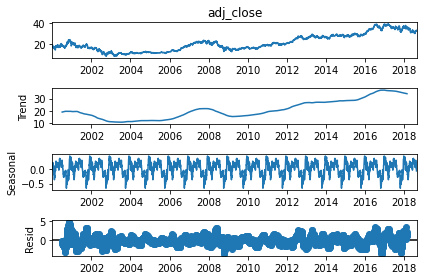

In [8]:
#Checking the additive decomposition (y = Trend * Seasonal * Residuals)
#periods 5(weekly), 20(monthly), 253(yearly)
result_add_T = seasonal_decompose(df_telekom['adj_close'], model='additive', period=253)
result_add_T.plot();

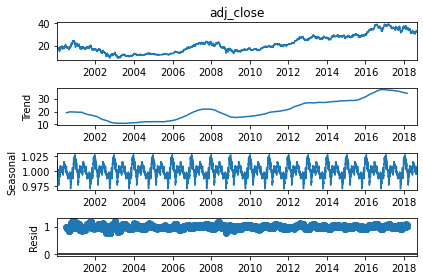

In [9]:
#Multiplicative Decomposition
result_mult_T = seasonal_decompose(df_telekom['adj_close'], model='multiplicative', period=253)
result_mult_T.plot();

### checking stationality

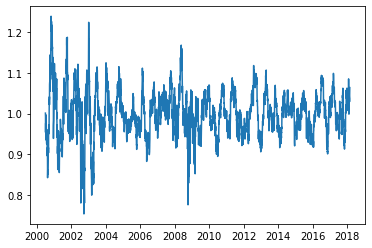

In [10]:
#Plot the residuals from multiplicative
plt.plot(result_mult_T._resid);

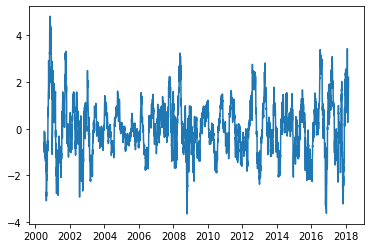

In [11]:
#Plot the residuals from additive
plt.plot(result_add_T._resid);

In [12]:
#Removing nan values from additive
result_observed_add=result_add_T.resid.dropna()

In [13]:
#Removing nan values from multiplicative
result_observed_mult=result_mult_T.resid.dropna()

In [14]:
#Test with dickey fuller test additive
adfuller(result_observed_add)[1]

1.1473483148038672e-14

In [15]:
#Test with dickey fuller test multiplicative
adfuller(result_observed_mult)[1]

1.1976801680390142e-13

### Autocorrelation

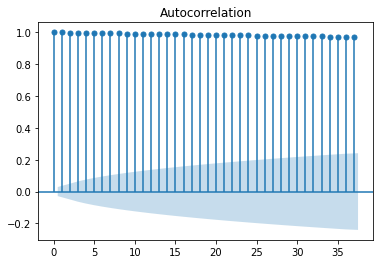

In [16]:
#Plotting autocorrelation "adj_close"
y = df_telekom.adj_close
plot_acf(y);

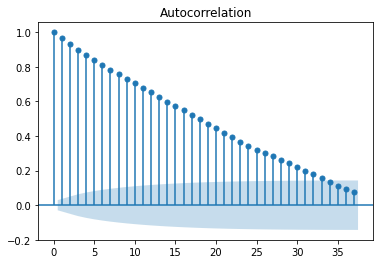

In [17]:
#plot the multiplicative residuals with acf 
plot_acf(result_observed_mult);

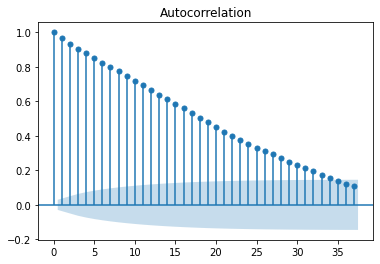

In [18]:
#plot the additive residuals with acf 
plot_acf(result_observed_add);

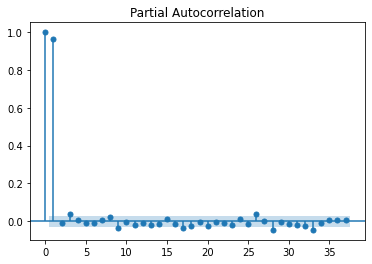

In [19]:
#plot the multiplicative residuals with pacf 
plot_pacf(result_observed_mult);

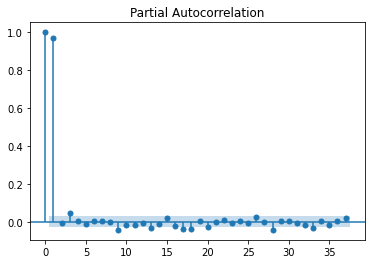

In [20]:
#plot the additive residuals with pacf 
plot_pacf(result_observed_add);

## Building the Model (SARIMAX)

### Splitting the data (train/test)

In [28]:
#Split the data in train / test 
df_telekom_train = df_telekom[:"2014"]
df_telekom_test = df_telekom["2015":]
print(df_telekom_train.shape)
print(df_telekom_test.shape)

(3773, 9)
(919, 9)


In [50]:
#use the auto arima and train data to get the parameters
model = pm.auto_arima(df_telekom_train["log_adj_close"],
                      m=5, # frequency of series. Important to choose manually
                      seasonal=True,
                      stepwise=True,  # only check most interesting combination. False will take way longer.
                      start_p=0, max_p=2,
                      start_d=0, max_d=1,
                      start_q=0, max_q=2,
                      start_P=0, max_P=2,
                      start_D=0, max_D=2,
                      start_Q=0, max_Q=2,
                      njobs=-1, trace=True, error_action="ignore",  suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=-19899.484, Time=0.86 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=-19895.894, Time=3.44 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=-19895.837, Time=3.02 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=-19901.368, Time=0.33 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=-19897.854, Time=1.55 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=-19897.791, Time=1.91 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=-19895.390, Time=4.44 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=-19897.514, Time=0.61 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=-19897.517, Time=1.09 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=-19910.645, Time=5.27 sec
 ARIMA(1,1,1)(1,0,0)[5] intercept   : AIC=-19895.365, Time=14.78 sec
 ARIMA(1,1,1)(0,0,1)[5] intercept   : AIC=-19895.343, Time=12.66 sec
 ARIMA(1,1,1)(1,0,1)[5] intercept   : AIC=-19893.112, Time=13.82 sec
 ARIMA(2,1,1)(0,0,0)[5] intercept   : AIC=-19908.192, Time=0.91 sec
 A

In [36]:
#Best model params
#ARIMA(2,1,2)(0,0,0)[5]   m=5

### Define the model

In [25]:
#I make the log to run the SARIMA Model
df_telekom.loc[:,"log_adj_close"] = df_telekom["adj_close"].apply(lambda x: math.log(x))

/home/luis/.pyenv/versions/3.8.6/envs/stock_prices_predictions/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/luis/.pyenv/versions/3.8.6/envs/stock_prices_predictions/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [26]:
df_telekom.head()

,ticker,open,close,adj_close,low,high,volume,sector,log_adj_close
date,,,,,,,,,
2000-01-03,T,48.5625,47.0000,19.225044,46.6250,49.00,5791900,PUBLIC UTILITIES,2.956214
2000-01-04,T,47.0625,44.2500,18.100174,43.5000,47.75,7173600,PUBLIC UTILITIES,2.895922
2000-01-05,T,45.0000,44.9375,18.381397,44.4375,45.25,9090000,PUBLIC UTILITIES,2.911339
2000-01-06,T,44.5625,43.7500,17.993273,43.1250,45.00,7153600,PUBLIC UTILITIES,2.889998
2000-01-07,T,44.5625,44.1250,18.147497,43.3750,44.75,5885600,PUBLIC UTILITIES,2.898533


In [85]:
#Specify training data
data = df_telekom_train["log_adj_close"]
#Define the model configuration
my_order = (2, 1, 2)
my_seasonal_order = (0, 0, 0, 5)
#Define the model #replace with data
model_sarimax = SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)
#Fit the model 
model_fit = model_sarimax.fit()

/home/luis/.pyenv/versions/3.8.6/envs/stock_prices_predictions/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/luis/.pyenv/versions/3.8.6/envs/stock_prices_predictions/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


### First prediction

In [42]:
df_telekom_test.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-20', '2018-08-21', '2018-08-22',
               '2018-08-23', '2018-08-24'],
              dtype='datetime64[ns]', name='date', length=919, freq=None)

In [86]:
#Forecast
n_periods = len(df_telekom_test["log_adj_close"])
forecast = model_fit.get_forecast(steps = n_periods)
index_y_test = df_telekom_test.index 

/home/luis/.pyenv/versions/3.8.6/envs/stock_prices_predictions/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [87]:
forecast.summary_frame()

log_adj_close,mean,mean_se,mean_ci_lower,mean_ci_upper
3773,3.316905,0.017241,3.283113,3.350696
3774,3.317537,0.024344,3.269823,3.365250
3775,3.317453,0.029186,3.260250,3.374656
3776,3.317725,0.033225,3.252604,3.382846
3777,3.317736,0.036598,3.246005,3.389467
...,...,...,...,...
4687,3.318091,0.428607,2.478037,4.158145
4688,3.318091,0.428840,2.477580,4.158603
4689,3.318091,0.429074,2.477122,4.159060
4690,3.318091,0.429307,2.476665,4.159517


In [102]:
df_telekom_test.head()

,ticker,open,close,adj_close,low,high,volume,sector,log_adj_close
date,,,,,,,,,
2015-01-02,T,33.590000,33.869999,27.816797,33.590000,33.970001,20564000,PUBLIC UTILITIES,3.325640
2015-01-05,T,33.869999,33.549999,27.553989,33.520000,33.919998,30429100,PUBLIC UTILITIES,3.316147
2015-01-06,T,33.770000,33.599998,27.595049,33.349998,33.810001,29595800,PUBLIC UTILITIES,3.317636
2015-01-07,T,33.580002,33.169998,27.628361,32.730000,33.590000,31660000,PUBLIC UTILITIES,3.318843
2015-01-08,T,33.240002,33.500000,27.903236,33.150002,33.580002,22799800,PUBLIC UTILITIES,3.328743


In [106]:
df_telekom_train.index[0]

Timestamp('2000-01-03 00:00:00')

In [121]:
#Forecast
n_periods = len(df_telekom_test["log_adj_close"])
start = len(df_telekom_train)
end = start + len(df_telekom_test) 
forecast_predict = model_fit.get_prediction(start = start, end = end)
index_y_test = df_telekom_test.index 

/home/luis/.pyenv/versions/3.8.6/envs/stock_prices_predictions/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [122]:
forecast_predict.summary_frame()

log_adj_close,mean,mean_se,mean_ci_lower,mean_ci_upper
3773,3.316905,0.017241,3.283113,3.350696
3774,3.317537,0.024344,3.269823,3.365250
3775,3.317453,0.029186,3.260250,3.374656
3776,3.317725,0.033225,3.252604,3.382846
3777,3.317736,0.036598,3.246005,3.389467
...,...,...,...,...
4688,3.318091,0.428840,2.477580,4.158603
4689,3.318091,0.429074,2.477122,4.159060
4690,3.318091,0.429307,2.476665,4.159517
4691,3.318091,0.429540,2.476208,4.159974


In [123]:
#Putting it into a dataframe
forecast_predict_df = forecast_predict.summary_frame()
forecast_predict_df.head()

log_adj_close,mean,mean_se,mean_ci_lower,mean_ci_upper
3773,3.316905,0.017241,3.283113,3.350696
3774,3.317537,0.024344,3.269823,3.365250
3775,3.317453,0.029186,3.260250,3.374656
3776,3.317725,0.033225,3.252604,3.382846
3777,3.317736,0.036598,3.246005,3.389467


In [124]:
forecast_predict_df.describe()

log_adj_close,mean,mean_se,mean_ci_lower,mean_ci_upper
count,920.000000,920.000000,920.000000,920.000000
mean,3.318087,0.287388,2.754815,3.881358
std,0.000052,0.100496,0.196957,0.196981
min,3.316905,0.017241,2.475751,3.350696
25%,3.318091,0.216034,2.588169,3.741511
50%,3.318091,0.304438,2.721404,3.914778
75%,3.318091,0.372416,2.894671,4.048013
max,3.318091,0.429773,3.283113,4.160431


In [111]:
#forecast_predict_df = forecast_predict_df.iloc[1:] 

In [112]:
type(forecast_predict_df)

pandas.core.frame.DataFrame

In [113]:
#I make the log to run the SARIMA Model
#forecast_predict_df["log_adj_close"] = forecast_predict_df["mean"].apply(lambda x: math.log(x))
#forecast_predict_df["log_mean_ci_lower"] = forecast_predict_df["mean_ci_lower"].apply(lambda x: math.log(x))
#forecast_predict_df["log_mean_ci_upper"] = forecast_predict_df["mean_ci_upper"].apply(lambda x: math.log(x))

In [125]:
forecast_predict_df.head()

log_adj_close,mean,mean_se,mean_ci_lower,mean_ci_upper
3773,3.316905,0.017241,3.283113,3.350696
3774,3.317537,0.024344,3.269823,3.365250
3775,3.317453,0.029186,3.260250,3.374656
3776,3.317725,0.033225,3.252604,3.382846
3777,3.317736,0.036598,3.246005,3.389467


In [126]:
#add a column with the exponential form of my predictions (from forecast_predict_df)
forecast_predict_df["exp_adj_close"] = forecast_predict_df["mean"].apply(lambda x: math.exp(x))
forecast_predict_df["exp_mean_ci_lower"] = forecast_predict_df["mean_ci_lower"].apply(lambda x: math.exp(x))
forecast_predict_df["exp_mean_ci_upper"] = forecast_predict_df["mean_ci_upper"].apply(lambda x: math.exp(x))


In [127]:
forecast_df.head()

log_adj_close,mean,mean_se,mean_ci_lower,mean_ci_upper,exp_adj_close,exp_mean_ci_lower,exp_mean_ci_upper
date,,,,,,,
2015-01-02,3.317397,0.017254,3.283580,3.351215,27.588455,26.671078,28.537387
2015-01-05,3.318314,0.024365,3.270560,3.366068,27.613751,26.326074,28.964412
2015-01-06,3.318587,0.029211,3.261335,3.375840,27.621300,26.084324,29.248840
2015-01-07,3.318669,0.033205,3.253588,3.383749,27.623552,25.883045,29.481100
2015-01-08,3.318693,0.036726,3.246711,3.390675,27.624223,25.705659,29.685981


In [68]:
central_new.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-20', '2018-08-21', '2018-08-22',
               '2018-08-23', '2018-08-24'],
              dtype='datetime64[ns]', name='date', length=919, freq=None)

In [70]:
central.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-20', '2018-08-21', '2018-08-22',
               '2018-08-23', '2018-08-24'],
              dtype='datetime64[ns]', name='date', length=919, freq=None)

In [ ]:
forecast_predict_df = forecast_predict_df.iloc[1:] 

In [140]:
central_new = pd.Series(forecast_predict_df["exp_adj_close"].values, index=df_telekom_test.index)
lower_new = pd.Series(forecast_predict_df["exp_mean_ci_lower"], index=df_telekom_test.index)
upper_new = pd.Series(forecast_predict_df["exp_mean_ci_upper"], index=df_telekom_test.index)

In [139]:
forecast_predict_df["exp_adj_close"].values

array([27.59229353, 27.58999895, 27.59749034, 27.59779744, 27.60125096,
       27.60201164, 27.60371496, 27.60436644, 27.60525621, 27.60571178,
       27.6061973 , 27.60649127, 27.60676436, 27.60694682, 27.6071035 ,
       27.60721444, 27.60730546, 27.60737215, 27.60742543, 27.60746526,
       27.60749659, 27.6075203 , 27.60753877, 27.60755284, 27.60756375,
       27.6075721 , 27.60757855, 27.60758349, 27.60758731, 27.60759024,
       27.60759249, 27.60759423, 27.60759556, 27.60759659, 27.60759738,
       27.60759799, 27.60759846, 27.60759882, 27.60759909, 27.60759931,
       27.60759947, 27.6075996 , 27.60759969, 27.60759977, 27.60759983,
       27.60759987, 27.6075999 , 27.60759993, 27.60759995, 27.60759997,
       27.60759998, 27.60759999, 27.60759999, 27.6076    , 27.6076    ,
       27.60760001, 27.60760001, 27.60760001, 27.60760001, 27.60760001,
       27.60760001, 27.60760002, 27.60760002, 27.60760002, 27.60760002,
       27.60760002, 27.60760002, 27.60760002, 27.60760002, 27.60

In [136]:
df_telekom_test.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-20', '2018-08-21', '2018-08-22',
               '2018-08-23', '2018-08-24'],
              dtype='datetime64[ns]', name='date', length=919, freq=None)

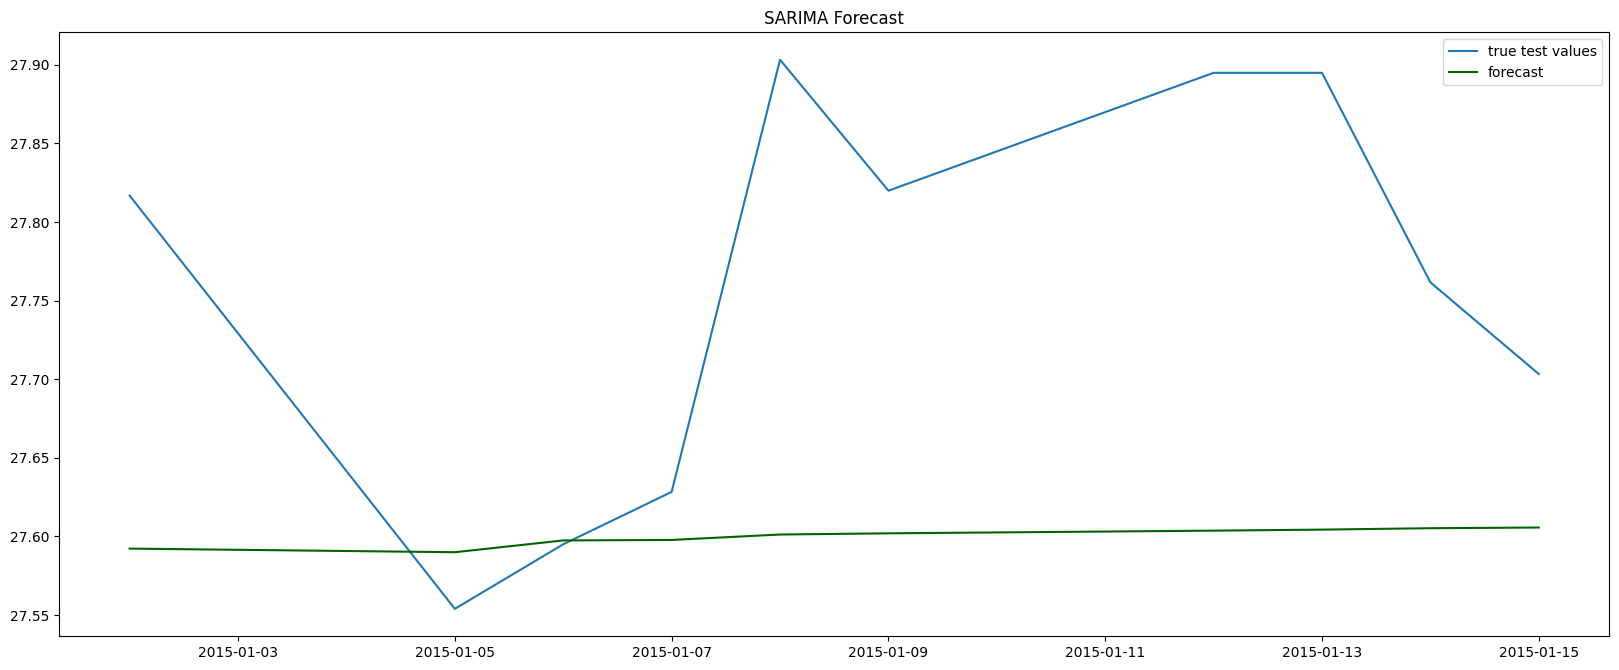

In [144]:
#Plotting my predictions against reality
plt.figure(figsize=(20,8), dpi=100)
#plt.plot(df_telekom_train["adj_close"], label="train values")
plt.plot(df_telekom_test.iloc[:10]["adj_close"], label="true test values")
plt.plot(central_new.iloc[:10], color="darkgreen", label="forecast")
#plt.fill_between(lower.index, 
                #lower,
                #upper,
                #color="k", alpha=0.10)

plt.title("SARIMA Forecast")
plt.legend()
plt.show()

In [138]:
central_new.head()

date
2015-01-02   NaN
2015-01-05   NaN
2015-01-06   NaN
2015-01-07   NaN
2015-01-08   NaN
Name: exp_adj_close, dtype: float64

In [34]:
#Putting my forecast results into a dataframe to work with it
forecast_df = forecast.summary_frame()
forecast_df.head()

log_adj_close,mean,mean_se,mean_ci_lower,mean_ci_upper
3773,3.317397,0.017254,3.283580,3.351215
3774,3.318314,0.024365,3.270560,3.366068
3775,3.318587,0.029211,3.261335,3.375840
3776,3.318669,0.033205,3.253588,3.383749
3777,3.318693,0.036726,3.246711,3.390675


In [35]:
#add a column with the date (from df_telekom)
forecast_df["date"] = df_telekom_test.index
forecast_df.head()

log_adj_close,mean,mean_se,mean_ci_lower,mean_ci_upper,date
3773,3.317397,0.017254,3.283580,3.351215,2015-01-02
3774,3.318314,0.024365,3.270560,3.366068,2015-01-05
3775,3.318587,0.029211,3.261335,3.375840,2015-01-06
3776,3.318669,0.033205,3.253588,3.383749,2015-01-07
3777,3.318693,0.036726,3.246711,3.390675,2015-01-08


In [36]:
#add a column with the exponential form of my predictions (from df_telekom)
forecast_df["exp_adj_close"] = forecast_df["mean"].apply(lambda x: math.exp(x))
forecast_df.head()

log_adj_close,mean,mean_se,mean_ci_lower,mean_ci_upper,date,exp_adj_close
3773,3.317397,0.017254,3.283580,3.351215,2015-01-02,27.588455
3774,3.318314,0.024365,3.270560,3.366068,2015-01-05,27.613751
3775,3.318587,0.029211,3.261335,3.375840,2015-01-06,27.621300
3776,3.318669,0.033205,3.253588,3.383749,2015-01-07,27.623552
3777,3.318693,0.036726,3.246711,3.390675,2015-01-08,27.624223


In [37]:
#setting my forecast_df with a date index
forecast_df.reset_index()
forecast_df = forecast_df.set_index(forecast_df["date"])
forecast_df = forecast_df.drop("date", axis=1)

In [38]:
#checking the result
forecast_df.head()

log_adj_close,mean,mean_se,mean_ci_lower,mean_ci_upper,exp_adj_close
date,,,,,
2015-01-02,3.317397,0.017254,3.283580,3.351215,27.588455
2015-01-05,3.318314,0.024365,3.270560,3.366068,27.613751
2015-01-06,3.318587,0.029211,3.261335,3.375840,27.621300
2015-01-07,3.318669,0.033205,3.253588,3.383749,27.623552
2015-01-08,3.318693,0.036726,3.246711,3.390675,27.624223


In [41]:
#add a column with the exponential form of my predictions mean_ci_lower and mean_ci_upper (from df_telekom)
forecast_df["exp_mean_ci_lower"] = forecast_df["mean_ci_lower"].apply(lambda x: math.exp(x))
forecast_df["exp_mean_ci_upper"] = forecast_df["mean_ci_upper"].apply(lambda x: math.exp(x))
forecast_df.head()

log_adj_close,mean,mean_se,mean_ci_lower,mean_ci_upper,exp_adj_close,exp_mean_ci_lower,exp_mean_ci_upper
date,,,,,,,
2015-01-02,3.317397,0.017254,3.283580,3.351215,27.588455,26.671078,28.537387
2015-01-05,3.318314,0.024365,3.270560,3.366068,27.613751,26.326074,28.964412
2015-01-06,3.318587,0.029211,3.261335,3.375840,27.621300,26.084324,29.248840
2015-01-07,3.318669,0.033205,3.253588,3.383749,27.623552,25.883045,29.481100
2015-01-08,3.318693,0.036726,3.246711,3.390675,27.624223,25.705659,29.685981


In [44]:
df_telekom_test.head()

,ticker,open,close,adj_close,low,high,volume,sector,log_adj_close
date,,,,,,,,,
2015-01-02,T,33.590000,33.869999,27.816797,33.590000,33.970001,20564000,PUBLIC UTILITIES,3.325640
2015-01-05,T,33.869999,33.549999,27.553989,33.520000,33.919998,30429100,PUBLIC UTILITIES,3.316147
2015-01-06,T,33.770000,33.599998,27.595049,33.349998,33.810001,29595800,PUBLIC UTILITIES,3.317636
2015-01-07,T,33.580002,33.169998,27.628361,32.730000,33.590000,31660000,PUBLIC UTILITIES,3.318843
2015-01-08,T,33.240002,33.500000,27.903236,33.150002,33.580002,22799800,PUBLIC UTILITIES,3.328743


In [46]:
#Having a first view of my results
#plt.plot(forecast_df["exp_adj_close"])
#plt.plot(forecast_df["exp_mean_ci_lower"])
#plt.plot(forecast_df["exp_mean_ci_upper"]);

In [42]:
#Make series for plotting purpose
central = pd.Series(forecast_df["exp_adj_close"], index=df_telekom_test.index)
lower = pd.Series(forecast_df["exp_mean_ci_lower"], index=df_telekom_test.index)
upper = pd.Series(forecast_df["exp_mean_ci_upper"], index=df_telekom_test.index)

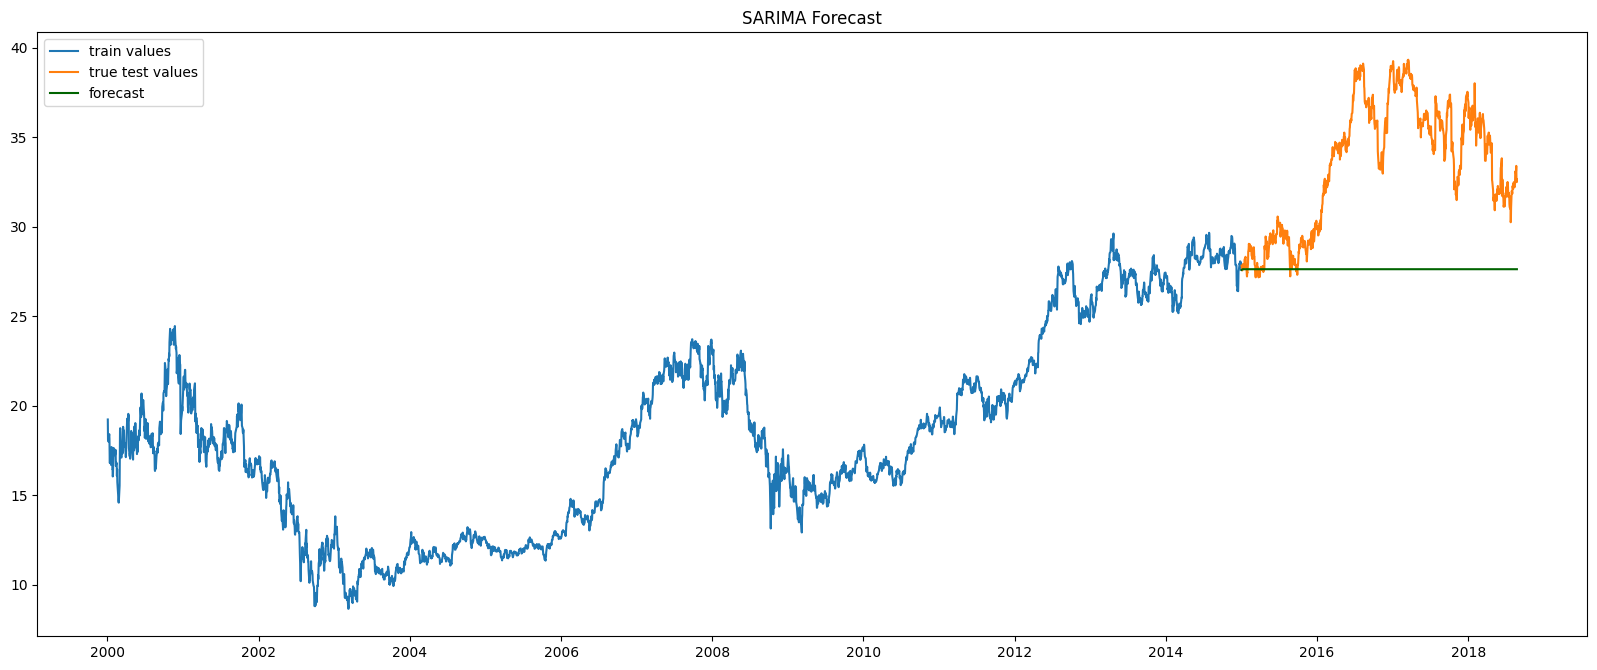

In [49]:
#Plotting my predictions against reality
plt.figure(figsize=(20,8), dpi=100)
plt.plot(df_telekom_train["adj_close"], label="train values")
plt.plot(df_telekom_test["adj_close"], label="true test values")
plt.plot(central, color="darkgreen", label="forecast")
#plt.fill_between(lower.index, 
                #lower,
                #upper,
                #color="k", alpha=0.10)

plt.title("SARIMA Forecast")
plt.legend()
plt.show()

In [51]:
central

date
2015-01-02    27.588455
2015-01-05    27.613751
2015-01-06    27.621300
2015-01-07    27.623552
2015-01-08    27.624223
                ...    
2018-08-20    27.624509
2018-08-21    27.624509
2018-08-22    27.624509
2018-08-23    27.624509
2018-08-24    27.624509
Name: exp_adj_close, Length: 919, dtype: float64